# CIFAR-10 image recognition

In [2]:
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Data preparation

### Reading dataset

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def parse_image(row):
    row = row / 255.
    r = row[:1024]
    g = row[1024:2048]
    b = row[2048:]

    return np.asarray([r, g, b]).T.reshape(32, 32, 3)

In [11]:
x_train = []
y_train = []

for i in range(5):
    batch = unpickle('cifar-10-batches-py/data_batch_{0}'.format(i+1))
    x_train_ = np.asarray(list(map(parse_image, batch[b'data'])))
    y_train_ = batch[b'labels']
    # filenames = batch[b'filenames']
    x_train.append(x_train_)
    y_train.append(y_train_)
else:
    x_train = np.asarray(x_train).reshape(-1, 32, 32, 3)
    y_train = np.asarray(y_train).reshape(-1, 1)
    
test_batch = unpickle('cifar-10-batches-py/test_batch')
x_test = np.asarray(list(map(parse_image, test_batch[b'data'])))
y_test = test_batch[b'labels']

In [13]:
pickle.dump(x_train, open('train_x.pkl', 'wb'))
pickle.dump(y_train, open('train_y.pkl', 'wb'))

pickle.dump(x_test, open('test_x.pkl', 'wb'))
pickle.dump(y_test, open('test_y.pkl', 'wb'))

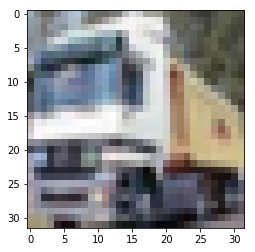

In [15]:
%matplotlib inline

plt.imshow(x_train[1])
plt.show()

### Feature augmentation

#### Rotating images

In [58]:
def rotate_image(img, angles=[90, 180, 270]):
    h, w = img.shape[:2]
    center = (w / 2., h / 2.)
    
    rotated_images = []

    for angle in angles:
        M = cv2.getRotationMatrix2D(center, angle , 1.)
        rotated_images.append(cv2.warpAffine(img, M, (h, w)))
        
    return rotated_images

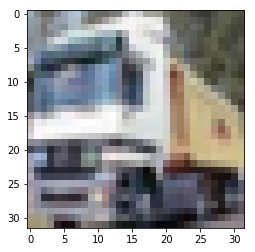

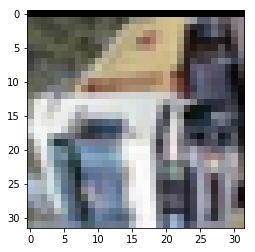

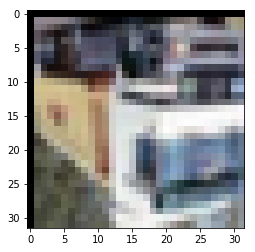

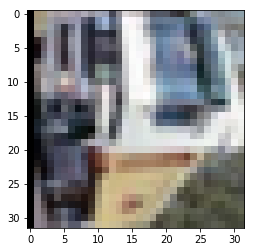

In [70]:
%matplotlib inline

img = x_train[1]
plt.imshow(img)
plt.show()

for img_ in rotate_image(img):
    plt.imshow(img_)
    plt.show()

In [ ]:
x_train_ = []
y_train_ = []

for i, y in enumerate(y_train):
    x_ = rotate_image(x_train[i])
    y_ = [y] * len(y)
    
    x_train_ = x_train_ + x_
    y_train_ = y_train_ + y_

In [ ]:
len(x_train_)

## Machine Learning

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [53]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
model.fit(x_train,
          y_train,
          batch_size=32,
          validation_data=(x_test, y_test),
          epochs=5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 59s 1ms/step - loss: 1.5159 - acc: 0.4451 - val_loss: 1.1266 - val_acc: 0.5947
Epoch 2/5
50000/50000 [==============================] - 44s 884us/step - loss: 1.1244 - acc: 0.6010 - val_loss: 0.9331 - val_acc: 0.6703
Epoch 3/5
50000/50000 [==============================] - 44s 876us/step - loss: 0.9675 - acc: 0.6587 - val_loss: 0.8273 - val_acc: 0.7122
Epoch 4/5
50000/50000 [==============================] - 47s 932us/step - loss: 0.8858 - acc: 0.6879 - val_loss: 0.8036 - val_acc: 0.7218
Epoch 5/5
50000/50000 [==============================] - 48s 955us/step - loss: 0.8133 - acc: 0.7137 - val_loss: 0.8094 - val_acc: 0.7201
